

***** Planning for a Dynamic car *****

50 90 0 0 0 0 0 0
50.0757 90.0001 0.00261612 0.0506569 0.0517889 0.0169421 0.0173207 2.99233
50.3029 90.0025 0.0209628 0.101314 0.103578 0.0169421 0.0173207 2.99233
50.6812 90.0193 0.0709406 0.151971 0.155367 0.0169421 0.0173207 2.99233
51.2074 90.0814 0.168796 0.202627 0.207156 0.0169421 0.0173207 2.99233
51.8676 90.2479 0.331309 0.253284 0.258945 0.0169421 0.0173207 2.99233
52.6159 90.6091 0.575996 0.303941 0.310734 0.0169421 0.0173207 2.99233
53.3368 91.2725 0.921346 0.354598 0.362523 0.0169421 0.0173207 2.99233
53.7982 92.2993 1.38708 0.405255 0.414311 0.0169421 0.0173207 2.99233
53.6551 93.5589 1.99447 0.455912 0.4661 0.0169421 0.0173207 2.99233
53.5966 93.6802 2.07298 -0.365897 0.401048 -0.274852 -0.0217566 2.99233
53.6197 93.6401 2.03958 0.334986 0.321226 0.234409 -0.0266964 2.99233
53.9137 92.8648 1.82721 -0.890702 0.239551 -0.409929 -0.0273162 2.99233
54.0004 91.165 1.42124 -0.255681 0.222468 0.212382 -0.0057132 2.99233
54.0248 91.3482

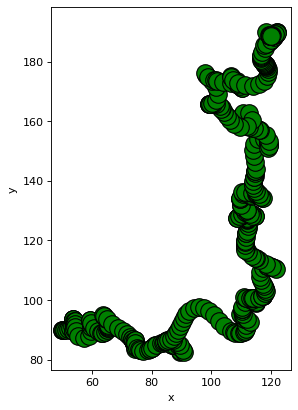

Solution is approximate. Distance to actual goal is 1.34562


In [3]:
import sys
from os.path import abspath, dirname, join



from ompl import base as ob
from ompl import control as oc
from ompl import app as oa

def plt_ompl_result(path):
    fig1 = plt.figure(figsize=(10, 6), dpi=80)
    ax1 = fig1.add_subplot(111, aspect='equal')   
#     path.interpolate(1000)
    states = path.getStates()
    for state in states:
        state = state[0]
        plt.scatter(state.getX(), state.getY(), color="green", s=250, edgecolors='black')  # path
    #     for state in collisionchecker.states_ok:
    #         plt.scatter(state[0], state[1], color="green", s=100, edgecolors='green')  # free sample
    #     for state in collisionchecker.states_bad:
    #         plt.scatter(state[0], state[1], color="red", s=100, edgecolors='red')  # collision sample
    # plt.scatter(start().getX(), start().getY(), color="blue", s=250, edgecolors='black')  # init
    # plt.scatter(goal().getX(), goal().getY(), color="red", s=250, edgecolors='black')  # goal

    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
    
def dynamicCarDemo(setup):
    print("\n\n***** Planning for a %s *****\n" % setup.getName())
    # plan for dynamic car in SE(2)
    stateSpace = setup.getStateSpace()

    # set the bounds for the R^2 part of SE(2)
    bounds = ob.RealVectorBounds(2)
    bounds.setLow(-10)
    bounds.setHigh(200)
    stateSpace.getSubspace(0).setBounds(bounds)

    # define start state
    start = ob.State(stateSpace)
    start[0] = start[1] = start[2] = start[3] = start[4] = 0.

    # define goal state
    goal = ob.State(stateSpace)
    goal[0] = goal[1] = 8.
    goal[2] = 0
    goal[3] = goal[4] = 0.

    start = ob.State(stateSpace)
    start[0] = 50
    start[1] = 90
    start[2] = 0
    start[3] = 0
    start[4] = 0

    # define goal state
    goal = ob.State(stateSpace)
    goal[0] = 120
    goal[1] = 190
    goal[2] = 0
    goal[3] = 0
    goal[4] = 0
    
    # set the start & goal states
    setup.setStartAndGoalStates(start, goal, .5)

    # set the planner
    planner = oc.RRT(setup.getSpaceInformation())
    setup.setPlanner(planner)
    setup.setup()
    # try to solve the problem
    if setup.solve(40):
        # print the (approximate) solution path: print states along the path
        # and controls required to get from one state to the next
        path = setup.getSolutionPath()
        path.interpolate(); # uncomment if you want to plot the path
        print(path.printAsMatrix())
        plt_ompl_result(path)
        if not setup.haveExactSolutionPath():
            print("Solution is approximate. Distance to actual goal is %g" %
                  setup.getProblemDefinition().getSolutionDifference())

    
car = oa.DynamicCarPlanning()
dynamicCarDemo(car)


In [4]:
def plt_ompl_result(path):
    fig1 = plt.figure(figsize=(10, 6), dpi=80)
    ax1 = fig1.add_subplot(111, aspect='equal')   
#     path.interpolate(1000)
    states = path.getStates()
    for state in states:
        state = state[0]
        plt.scatter(state.getX(), state.getY(), color="green", s=250, edgecolors='black')  # path
    #     for state in collisionchecker.states_ok:
    #         plt.scatter(state[0], state[1], color="green", s=100, edgecolors='green')  # free sample
    #     for state in collisionchecker.states_bad:
    #         plt.scatter(state[0], state[1], color="red", s=100, edgecolors='red')  # collision sample
    # plt.scatter(start().getX(), start().getY(), color="blue", s=250, edgecolors='black')  # init
    # plt.scatter(goal().getX(), goal().getY(), color="red", s=250, edgecolors='black')  # goal

    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
